<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<center><font size="8pt">Classification with Support Vector Machine</font></center>

# Introduction 

This `R` tutorial deals with Support Vector Machine (SVM) for classification. The aim is to illustrate the importance of the kernel choice and the tuning of the parameters by cross validation on different simulated data. 

It uses the `svm()` function of the `e1071` package. 

## About the `svm()` function

**Q:** Load the `e1071` package. What kernels does it contain?

In [40]:
library(e1071)

## Factor simulation

In the following, the factors $(X_i)_{1\leq i\leq n} $ are the same in all cases and are uniformly distributed on $[-1,1]\times [0,1]$. The difference between the different cases lies in the boundary form which classifies the points. We simulate a training set with `n=200` observations, and a test set with `ntest=100` points. 

In [41]:
# Training set:
n <- 200
x1 <- runif(n, min=-1, max=1)
x2 <- runif(n, min=0, max=1)
t <- seq(-1, 1, length=100)

# Test set:
ntest <- 100
x1test <- runif(ntest, min=-1, max=1)
x2test <- runif(ntest, min=0, max=1)

# Linear boundary

First, we assume that the points are linearly separated. 

## Data simulation

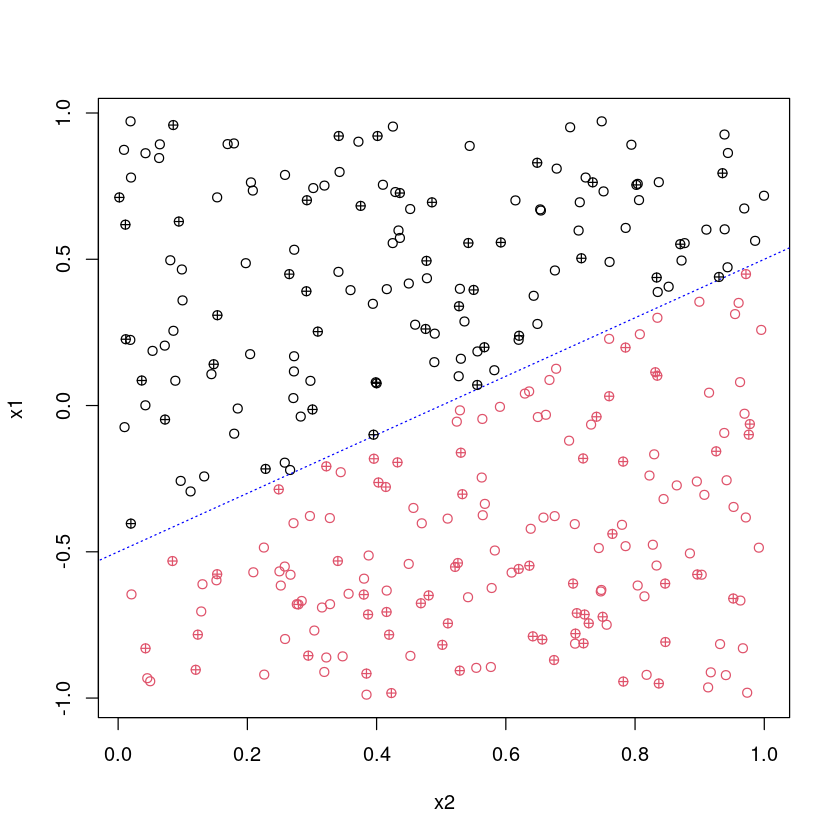

In [42]:
boundFunLin <- function(x1){
  x1 + 0.5
}

# Training set
gLin <- as.factor(x2 > boundFunLin(x1))
dataTrainLin <- data.frame(x1 = x1, x2 = x2, g = gLin)
plot(x2, x1, col=as.numeric(gLin))
lines(boundFunLin(t), t, col="blue", lty = "dotted")

# Test set
gLintest <- as.factor(x2test > boundFunLin(x1test))
dataTestLin <- data.frame(x1 = x1test, x2 = x2test, g = gLintest)
points(x2test, x1test, col=as.numeric(gLintest),pch=10)


## Linear SVM

We first use a linear kernel. 

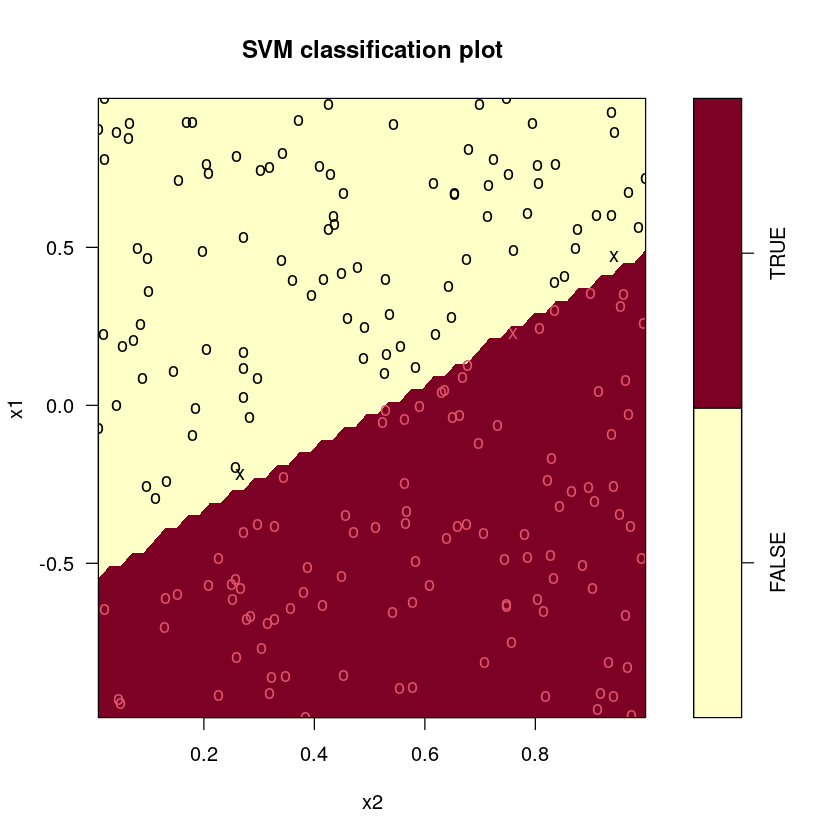

In [68]:
svm.model <- svm(g ~ ., data = dataTrainLin, type = "C", kernel = "lin", cross = 5, cost = 10000000)
plot(svm.model, data = dataTrainLin)

In [69]:
summary(svm.model)


Call:
svm(formula = g ~ ., data = dataTrainLin, type = "C", kernel = "lin", 
    cross = 5, cost = 1e+07)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+07 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 100 
Single Accuracies:
 100 100 100 100 100 




 cost is the value of C in the theory, by default, C=1

**Q:** How many support vectors are there? How are they represented on the plot? 
What is their minimal number? Can you change the parameters, such that this minimal number is achieved?

Minimal number : 3

To decrease the number of support vectors, we increase the number C (cost). If cost is really high, for example C= 10000000, the number of support vector is 3

**Q:** What are the `Single Accuracies` and the `Total Accuracy` in the `summary`? Why should we do some cross validation, even though there are no parameters to calibrate in the linear model?

**Q:** Verify that the fitted values are equal to the sign of the decision values. 

In [70]:
unique((svm.model$decision.values<0) == (svm.model$fitted))

,TRUE/FALSE
1,FALSE


In [71]:
(svm.model$fitted)
svm.model$decision.values<0

1     2     3     4     5     6     7     8     9    10    11    12    13 
 TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
 TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
 TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
 TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
 TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
 TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE 
  196   197   198   199   200 
FALSE FALSE  TRUE FALSE FALSE 
Levels: FALSE TRUE

,TRUE/FALSE
1,FALSE
2,TRUE
3,FALSE
4,FALSE
5,FALSE
6,FALSE
7,TRUE
8,FALSE
9,FALSE
10,TRUE


Note that it is possible to get the normalized support vectors. 

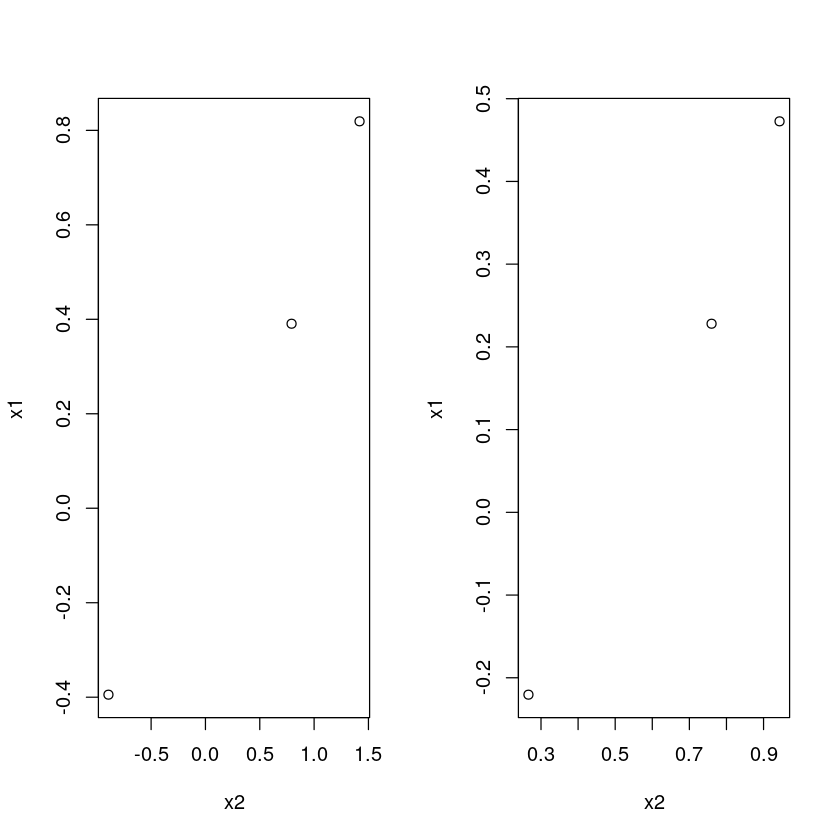

In [72]:
par(mfrow=c(1,2))
plot(x1~x2,data=svm.model$SV)
plot(x1~x2,data=dataTrainLin[svm.model$index,])

## Test set prediction

Let us now compute the contingency table and accuracy rate of `svm.model` on the test set. 

In [73]:
# Generalization error
pred.lin <- predict(svm.model,dataTestLin)
table(pred.lin,dataTestLin$g) 
paste("Generalization error: ",100*(1-sum(diag(table(pred.lin,dataTestLin$g)))/ntest),"%",sep="")

        
pred.lin FALSE TRUE
   FALSE    41    0
   TRUE      0   59

[1] "Generalization error: 0%"

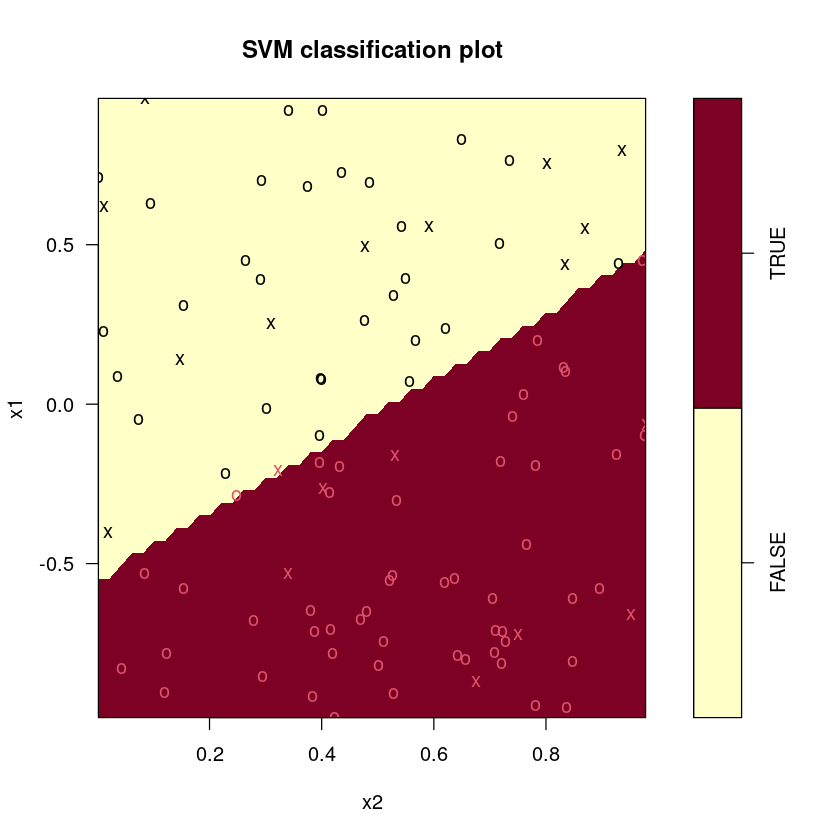

In [67]:
plot(svm.model,dataTestLin)

**Q:** Comment. 

# Cubic boundary

In this section, we assume that the points are separated by a cubic function (polynomial with degree 3). 

## Data simulation

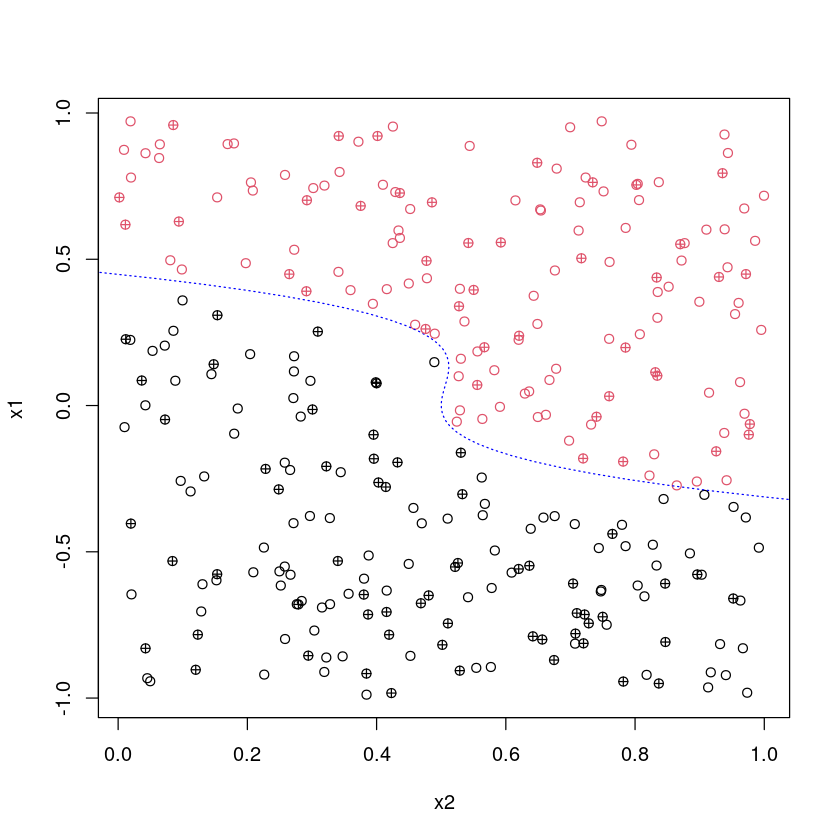

In [74]:
boundFunCub <- function(u){
  2*u^2 - 10*u^3 + 0.5
}

# Training set
gCub <- (x2 > boundFunCub(x1))
gCub <- as.factor(gCub)
dataTrainCub <- data.frame(x1 = x1, x2 = x2, g = gCub)
plot(x2, x1, col=as.numeric(gCub))
lines(boundFunCub(t), t, col="blue", lty = "dotted")

# Test set
gCubtest <- as.factor(x2test > boundFunCub(x1test))
dataTestCub <- data.frame(x1 = x1test, x2 = x2test, g = gCubtest)
points(x2test, x1test, col=as.numeric(gCubtest),pch=10)

## Linear SVM

With a linear kernel, we obtain the following.

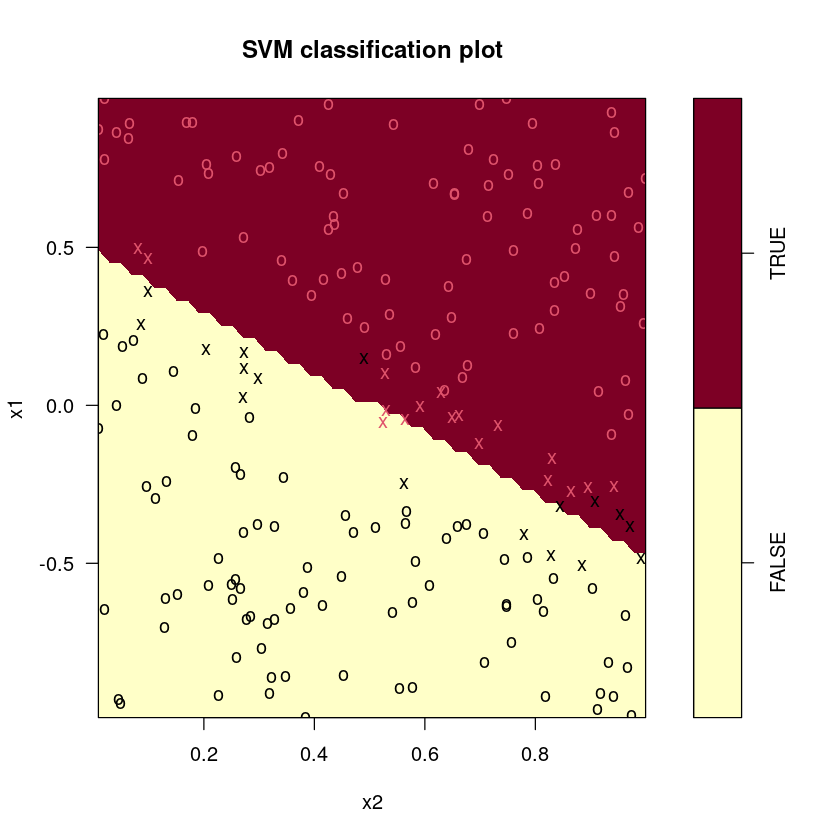

In [112]:
svm.Cub.lin <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "lin", cross = 5, cost= 1)
plot(svm.Cub.lin, data=dataTrainCub)

In [113]:
summary(svm.Cub.lin)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "lin", 
    cross = 5, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  34

 ( 17 17 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 97 
Single Accuracies:
 95 97.5 95 100 97.5 




**Q:** What is the generalization error here? Comment. 

## Polynomial SVM

Since we know here that the boundary is polynomial with degree 3, we can use a polynomial kernel.

### Polynomial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

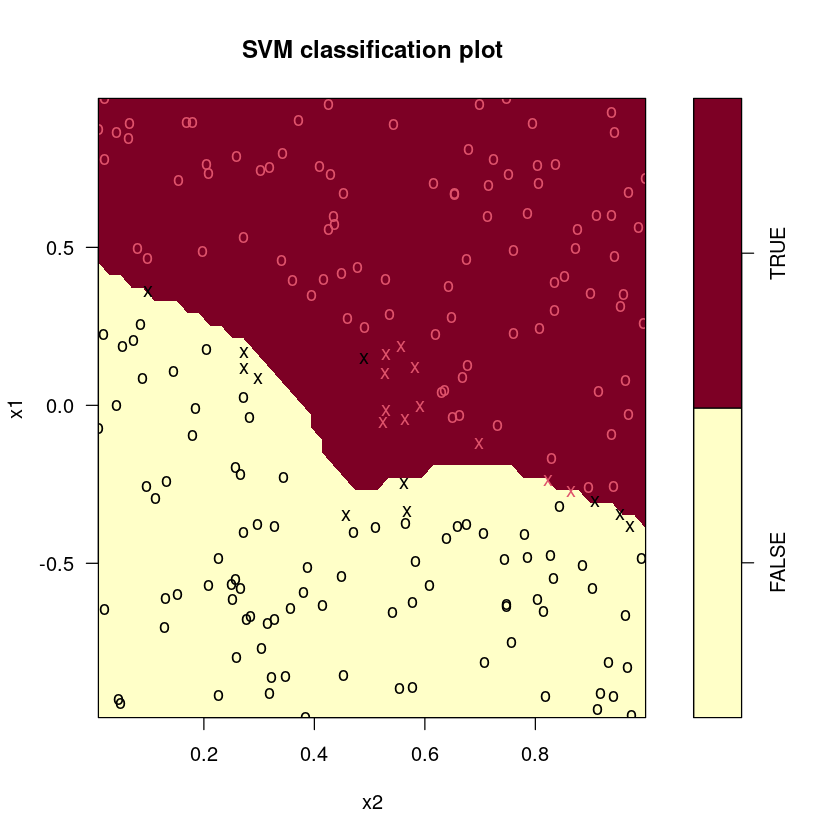

In [138]:
svm.Cub.poly <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", cross = 5, cost = 100)
plot(svm.Cub.poly, data = dataTrainCub)

In [139]:
summary(svm.Cub.poly)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "poly", 
    cross = 5, cost = 100)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  100 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  22

 ( 11 11 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 96.5 
Single Accuracies:
 100 95 97.5 95 95 




**Q:** Does this model seem reasonable? What should we do to improve it?

In order to study the training error, we can print the contingency table of the fitted values. 

In [140]:
table(svm.Cub.poly$fitted,dataTrainCub$g) # Il faudrait sur échantillon test !
paste("Training error: ",round(100*(1-sum(diag(table(svm.Cub.poly$fitted,dataTrainCub$g)))/nrow(dataTrainCub)),1),"%",sep="")

       
        FALSE TRUE
  FALSE    93    0
  TRUE      5  102

[1] "Training error: 2.5%"

**Q:** Comment.

### Tuned model

Since we know the degree in this example, we only tune the parameter `coef0`. 

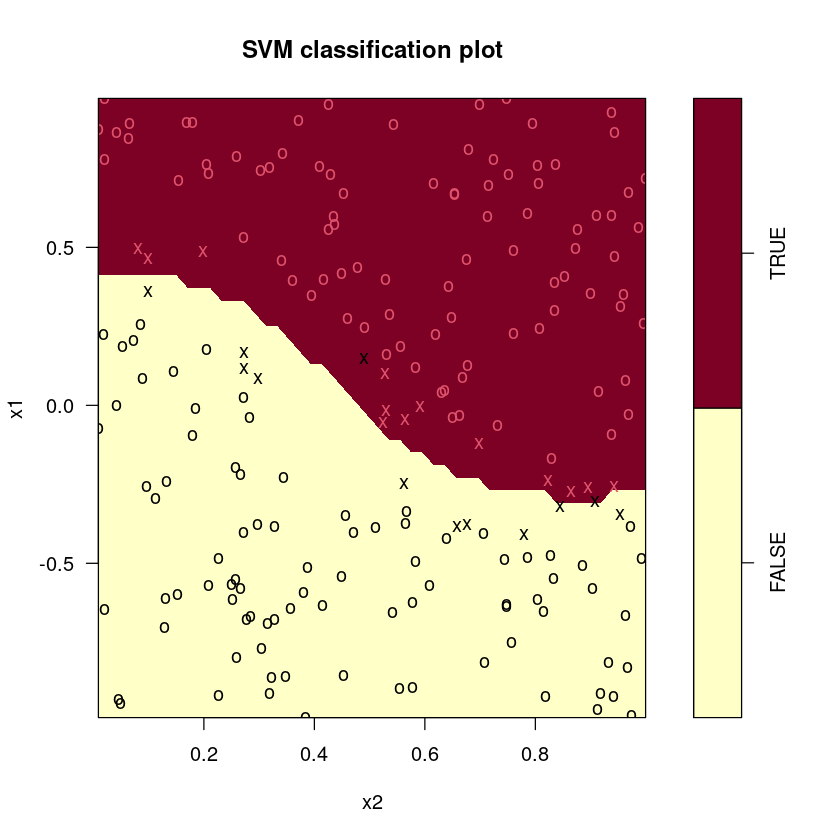

In [157]:
svm.Cub.poly.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", coef0 = -5:5, )
plot(svm.Cub.poly.tune$best.model, data = dataTrainCub)

In [160]:
#print(svm.Cub.poly.tune)
summary(svm.Cub.poly.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 coef0
     1

- best performance: 0.01 

- Detailed performance results:
   coef0 error dispersion
1     -5 0.150 0.08164966
2     -4 0.140 0.06992059
3     -3 0.230 0.09189366
4     -2 0.190 0.09660918
5     -1 0.210 0.09944289
6      0 0.085 0.10814085
7      1 0.010 0.02108185
8      2 0.020 0.02581989
9      3 0.015 0.02415229
10     4 0.015 0.02415229
11     5 0.015 0.02415229


**Q:** What value of `coef0` is obtained by cross validation? What is the generalization error in this case?

We can plot the generalization error (estimated by cross validation) w.r.t. `coef0`. 

,coef0
,<int>
7,1


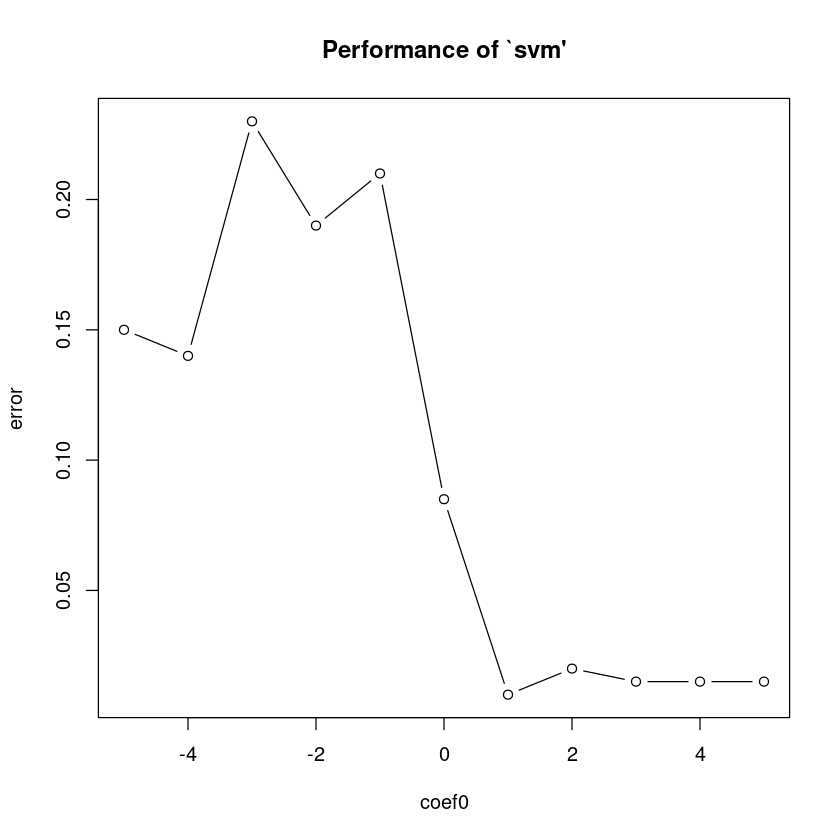

In [163]:
svm.Cub.poly.tune$best.parameters
plot(svm.Cub.poly.tune)

**Q:** Which parameter minimizes the error?  

## Radial SVM 

### Radial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

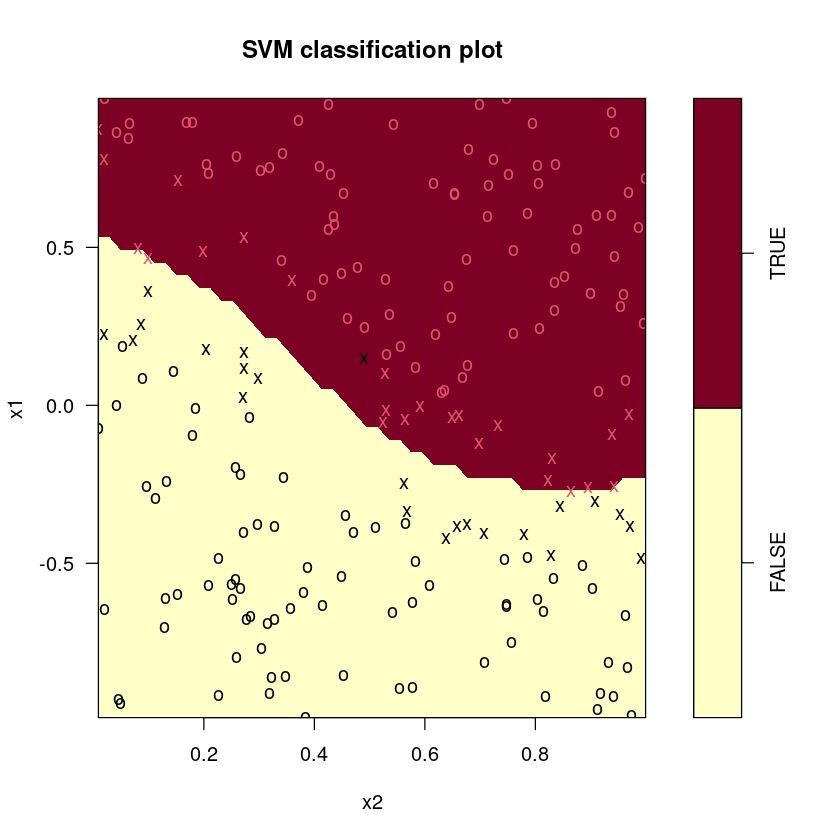

In [180]:
svm.Cub.rad <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", cross = 5,cost = 1, gamma=0.3)
plot(svm.Cub.rad, data = dataTrainCub) 

In [181]:
summary(svm.Cub.rad)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "radial", 
    cross = 5, cost = 1, gamma = 0.3)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  47

 ( 24 23 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 97.5 
Single Accuracies:
 97.5 95 97.5 100 97.5 




**Q:** How much is the generalization error (estimated by cross validation) here? Does the model seem reasonable?

### Tuned model

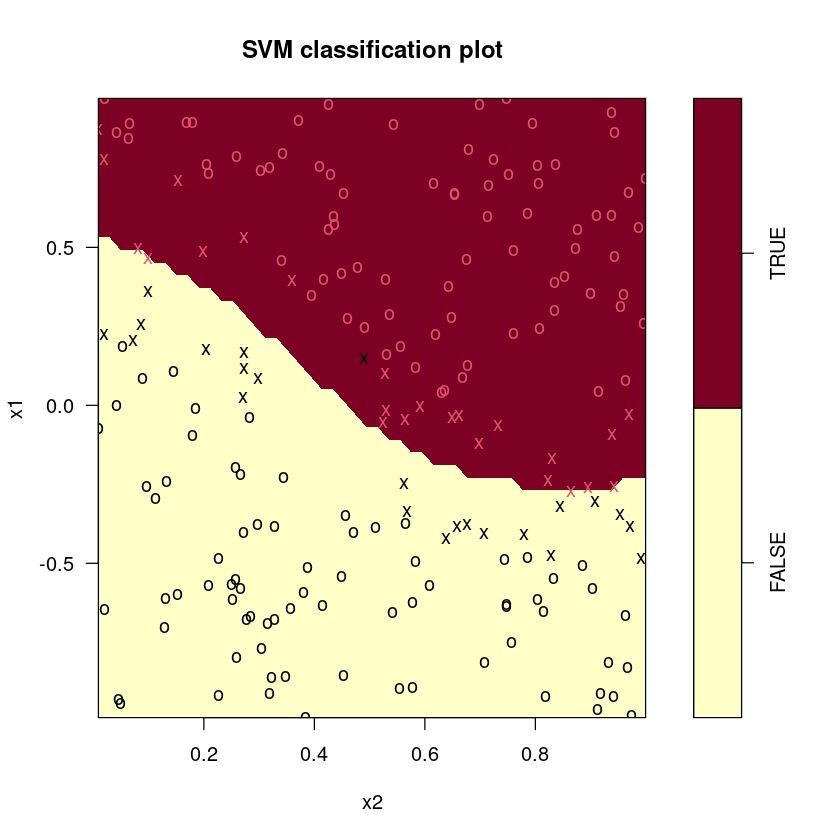

In [182]:
svm.Cub.rad.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", gamma = seq(0.1, 2, by = 0.2))
plot(svm.Cub.rad.tune$best.model, data = dataTrainCub)

In [183]:
# print(svm.Cub.rad.tune)
summary(svm.Cub.rad.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma
   0.3

- best performance: 0.01 

- Detailed performance results:
   gamma error dispersion
1    0.1 0.015 0.02415229
2    0.3 0.010 0.02108185
3    0.5 0.025 0.03535534
4    0.7 0.020 0.02581989
5    0.9 0.015 0.02415229
6    1.1 0.015 0.02415229
7    1.3 0.015 0.02415229
8    1.5 0.020 0.03496029
9    1.7 0.010 0.02108185
10   1.9 0.020 0.03496029


 We can plot the estimated generalization error w.r.t. `gamma`. 

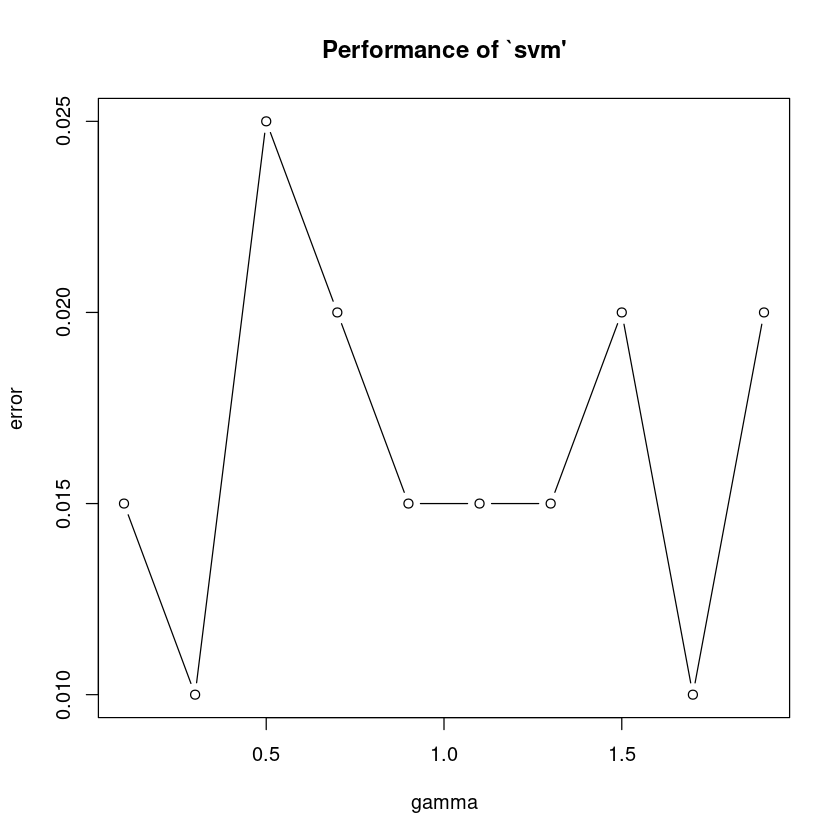

In [184]:
plot(svm.Cub.rad.tune)
# plot(error~gamma,data=svm.Cub.rad.tune$performances,type="b")
# svm.Cub.rad.tune$best.parameters

**Q:** Which parameter minimizes the error? What is the generalization error in that case? What is its values for the default parameter? 

## Model comparison

### Validation error (by cross validation)

Comparison of the cross-validation errors:

In [186]:
paste("Linear kernel:",100-svm.Cub.lin$tot.accuracy,"%",sep=" ")
paste("Default polynomial kernel:",100-svm.Cub.poly$tot.accuracy,"%",sep=" ")
paste("Tuned polynomial kernel:",100*(svm.Cub.poly.tune$best.performance),"%",sep=" ")
paste("Default radial kernel:",100-svm.Cub.rad$tot.accuracy,"%",sep=" ")
paste("Tuned radial kernel:",100*(svm.Cub.rad.tune$best.performance),"%",sep=" ")

[1] "Linear kernel: 3 %"

[1] "Default polynomial kernel: 3.5 %"

[1] "Tuned polynomial kernel: 1 %"

[1] "Default radial kernel: 2.5 %"

[1] "Tuned radial kernel: 1 %"

**Q:** Which model seems best?

### Test set prediction

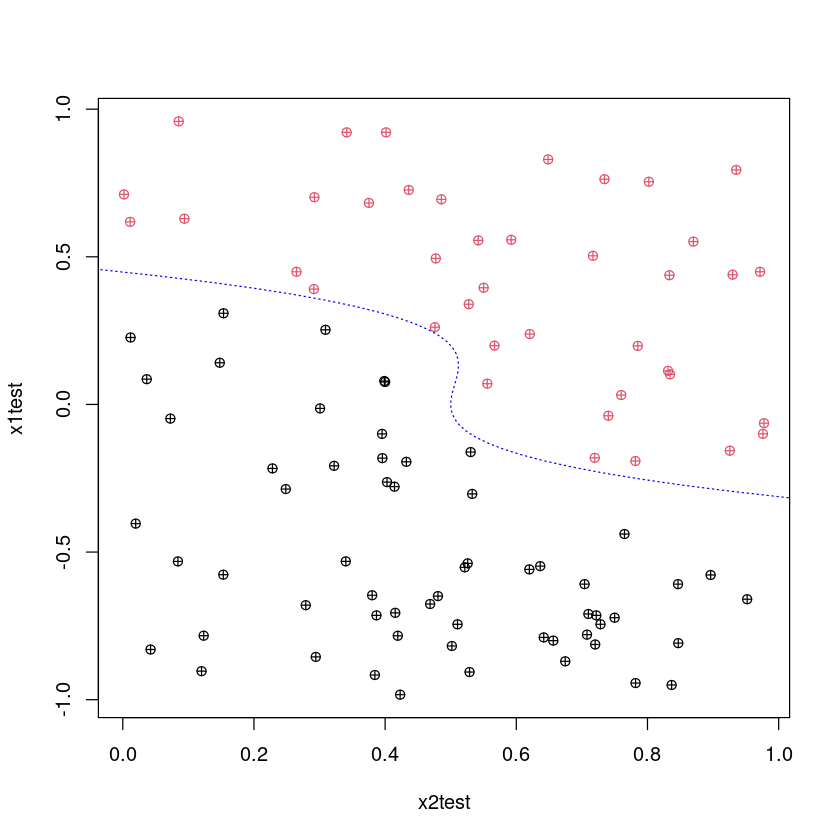

In [187]:
plot(x2test, x1test, col=as.numeric(gCubtest),pch=10)
lines(boundFunCub(t), t, col="blue", lty = "dotted")

            
pred.Cub.lin FALSE TRUE
       FALSE    59    0
       TRUE      1   40

[1] "Prediction error: 1 %"

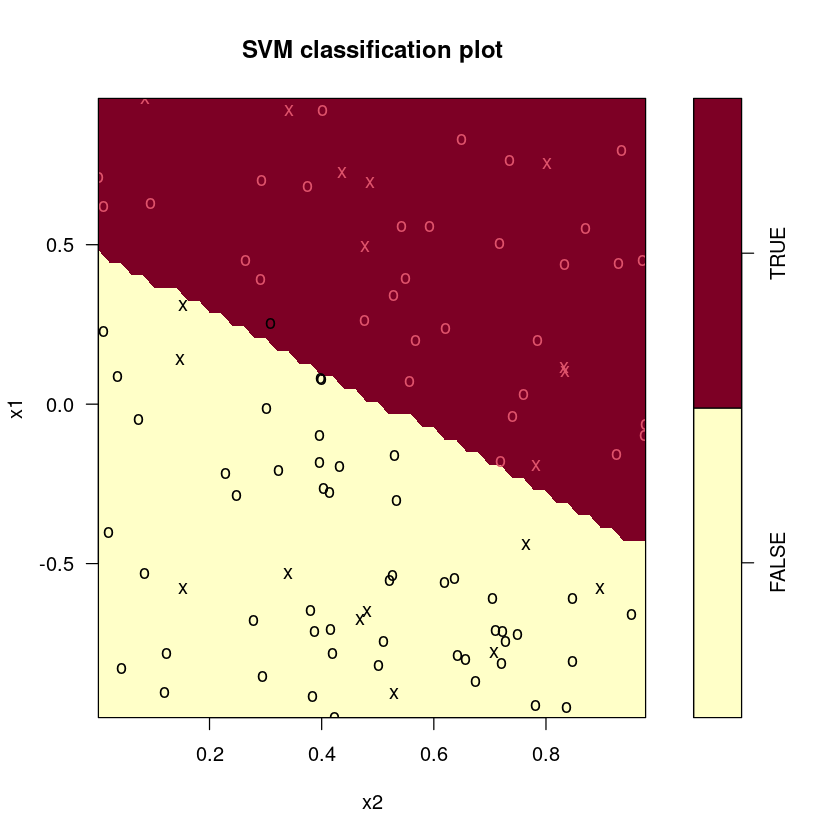

In [188]:
# Linear kernel
pred.Cub.lin <- predict(svm.Cub.lin,dataTestCub)
table(pred.Cub.lin,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.lin,dataTestCub)

             
pred.Cub.poly FALSE TRUE
        FALSE    53    0
        TRUE      7   40

[1] "Prediction error: 7 %"

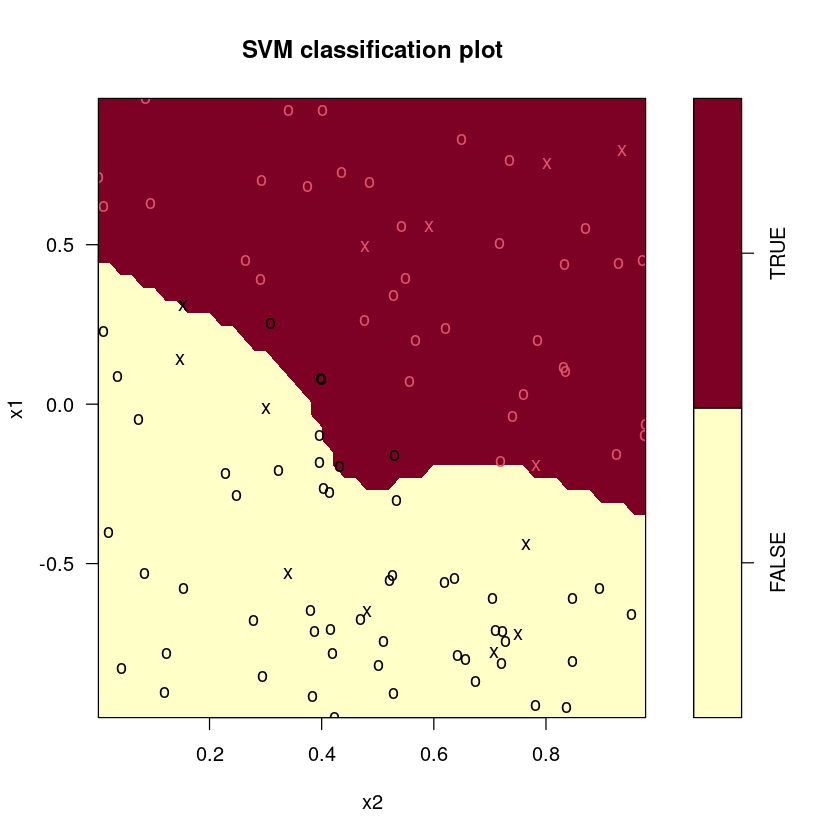

In [189]:
# Default polynomial kernel
pred.Cub.poly <- predict(svm.Cub.poly,dataTestCub)
table(pred.Cub.poly,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.poly,dataTestCub)

                  
pred.Cub.poly.tune FALSE TRUE
             FALSE    59    0
             TRUE      1   40

[1] "Prediction error: 1 %"

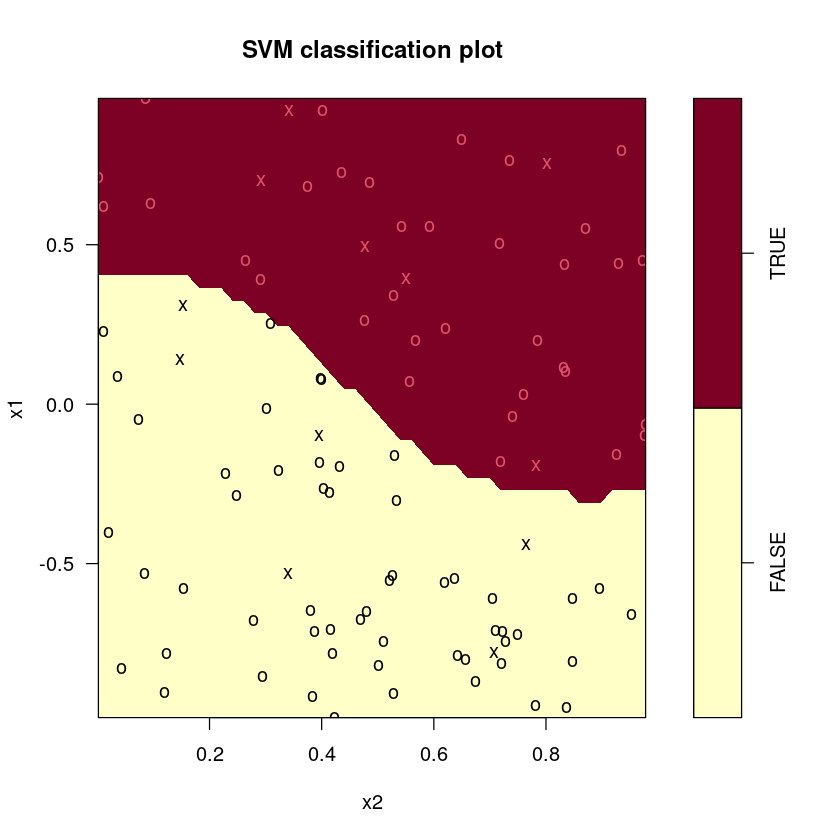

In [190]:
# Tuned polynomial kernel
pred.Cub.poly.tune <- predict(svm.Cub.poly.tune$best.model,dataTestCub)
table(pred.Cub.poly.tune,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.poly.tune$best.model,dataTestCub)

            
pred.Cub.rad FALSE TRUE
       FALSE    57    0
       TRUE      3   40

[1] "Prediction error: 3 %"

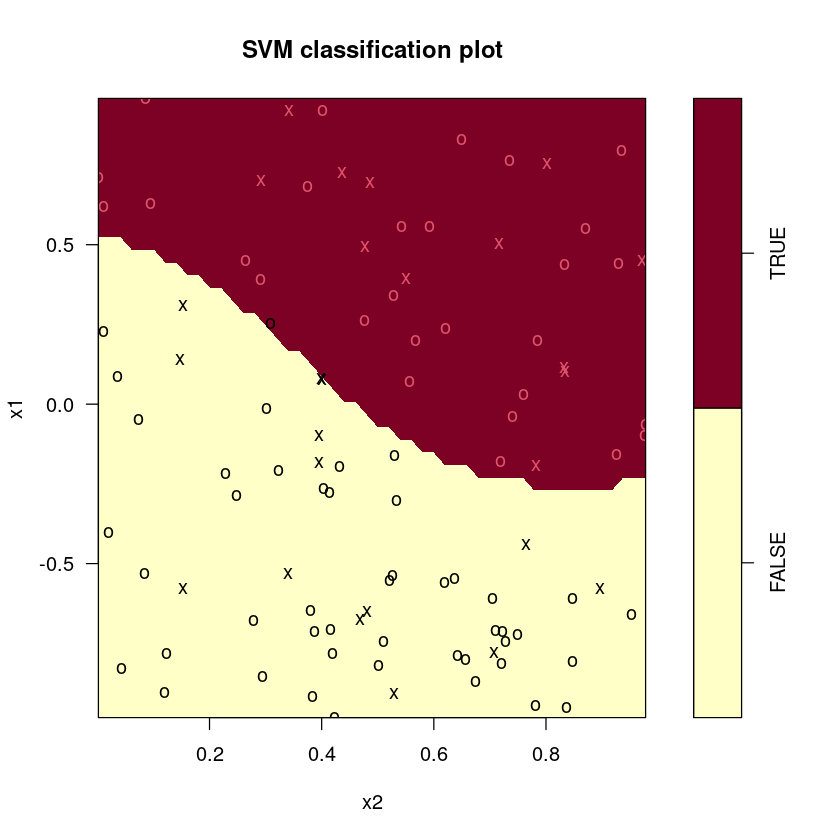

In [191]:
# Default radial kernel
pred.Cub.rad <- predict(svm.Cub.rad,dataTestCub)
table(pred.Cub.rad,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.rad,dataTestCub)

                 
pred.Cub.rad.tune FALSE TRUE
            FALSE    57    0
            TRUE      3   40

[1] "Prediction error: 3 %"

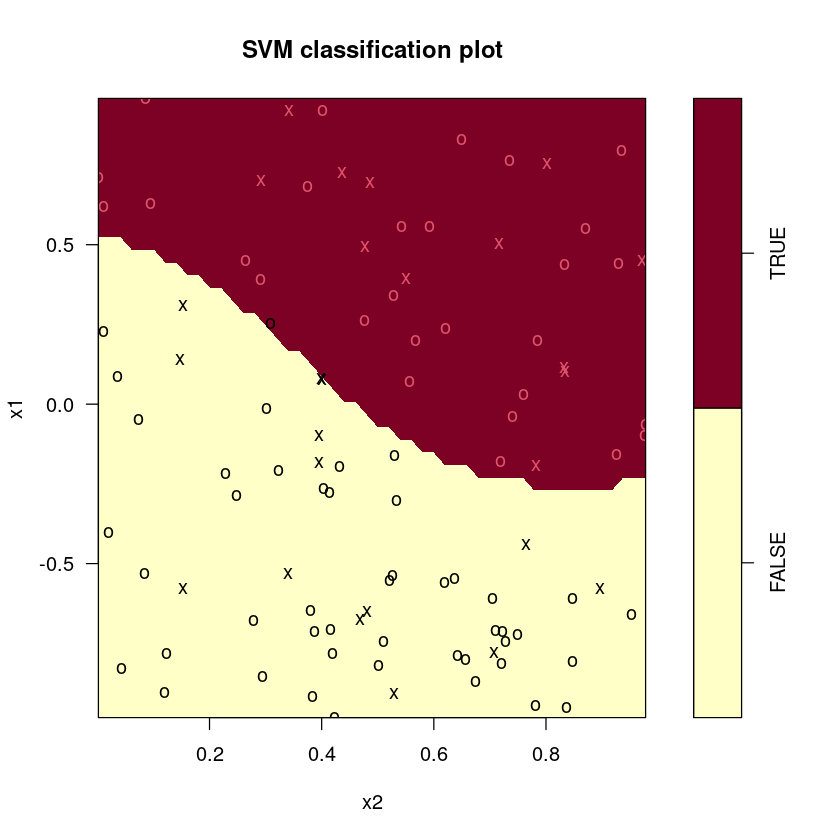

In [192]:
# Tuned radial kernel
pred.Cub.rad.tune <- predict(svm.Cub.rad.tune$best.model,dataTestCub)
table(pred.Cub.rad.tune,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.rad.tune$best.model,dataTestCub)

In [193]:
# Prediction accuracies
paste("Linear kernel:",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1),"%",sep=" ")
paste("Default polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Default radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest)),"%",sep=" ")

[1] "Linear kernel: 1 %"

[1] "Default polynomial kernel: 7 %"

[1] "Tuned polynomial kernel: 1 %"

[1] "Default radial kernel: 3 %"

[1] "Tuned radial kernel: 3 %"

**Q:** Conclude. 

# Absolute value boundary

In this section, we assume that the points are separated by an absolute value function. 

## Data simulation

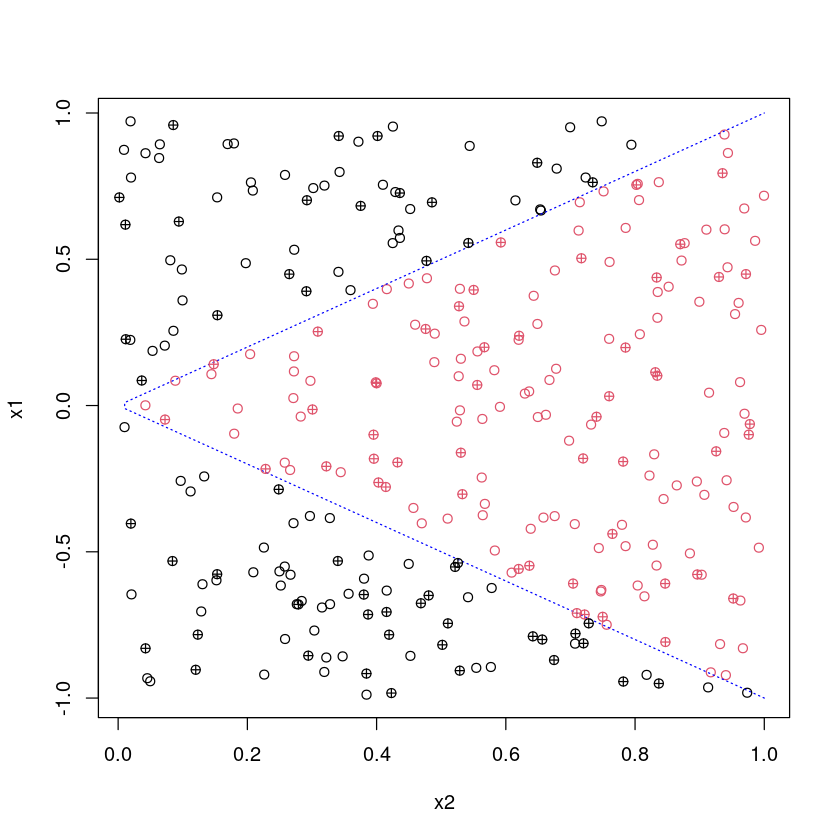

In [194]:
boundFunAbs <- function(x1){
  abs(x1)
}

# Training set
gAbs <- (x2 > boundFunAbs(x1))
gAbs <- as.factor(gAbs)
dataTrainAbs <- data.frame(x1 = x1, x2 = x2, g = gAbs)
plot(x2, x1, col=as.numeric(gAbs))
lines(boundFunAbs(t), t, col="blue", lty = "dotted")

# Test set
gAbstest <- as.factor(x2test > boundFunAbs(x1test))
dataTestAbs <- data.frame(x1 = x1test, x2 = x2test, g = gAbstest)
points(x2test, x1test, col=as.numeric(gAbstest),pch=10)

## Radial SVM

### Radial kernel with default parameters

**Q:** Train a first SVM classifier `svm.Abs.rad` based on a radial kernel with default parameters. 

### Radial kernel with `cost=1000`

**Q:** Train a second SVM classifier `svm.Abs.rad.cost1000` based on a radial kernel with default parameters, with `cost=1000`. What can you observe? 
What is the effect of the cost w.r.t. overfitting?

### Tuned radial model

**Q:** Tune a third model `svm.Abs.rad.tune` based on a radial kernel by cross validation. The parameters can be taken in the following grids: 
- `gamma = seq(0.1, 2, by = 0.2)`, 
- `cost = c(1, 25, 50, 75, 100, 150, 200)`. 

**Q:** For which parameters is the generalization error the smallest? What is its value in that case? 

**Q:** Plot the generalization error w.r.t `gamma` and `cost`. What do you observe?

## Test set prediction

**Q:** Compare the three radial models `svm.Abs.rad`, `svm.Abs.rad.tune.cost1000` and `svm.Abs.rad.tune` on the test set (in terms of contingency table and generalization error). Comment. 

# Sine boundary

## Data simulation

In [ ]:
boundFunSin <- function(x1){
  sin(2*pi*x1)
}

# Training set
gSin <- (x2 > boundFunSin(x1))
gSin <- as.factor(gSin)
dataTrainSin <- data.frame(x1 = x1, x2 = x2, g = gSin)
plot(x2, x1, col=as.numeric(gSin))
lines(boundFunSin(t), t, col="blue", lty = "dotted")

# Test set
gSintest <- as.factor(x2test > boundFunSin(x1test))
dataTestSin <- data.frame(x1 = x1test, x2 = x2test, g = gSintest)
points(x2test, x1test, col=as.numeric(gSintest),pch=10)


**Q:** Same questions as for the Absolute value boundary case (with radial kernels). 

## Radial SVM

### Default parameters

### With `cost=1000`

### Tuned model

## Model comparison

### Validation error (by cross validation)

### Test set prediction

# Disk boundary

## Data simulation

In [ ]:
boundFunDisk <- function(x1, x2){
   x1^2 + (x2 - 1/2)^2
}
r <- 0.4

# Training set
gDisk <- as.factor(boundFunDisk(x1, x2) < r^2)
dataTrainDisk <- data.frame(x1 = x1, x2 = x2, g = gDisk)
plot(x2, x1, col=as.numeric(gDisk))
lines(1/2 + r * cos(2*pi*t), r * sin(2*pi*t), col="blue", lty = "dotted")

# Test set
gDisktest <- as.factor(boundFunDisk(x1test, x2test) < r^2)
dataTestDisk <- data.frame(x1 = x1test, x2 = x2test, g = gDisktest)
points(x2test, x1test, col=as.numeric(gDisktest),pch=10)


**Q:** Same questions as for the Absolute value boundary case (with polynomial and radial kernels). 

## Polynomial SVM

### Default parameters

### Tuned model

## Radial SVM 

### Default parameters

### Tuned model

## Model comparison

### Validation error (by cross validation)

### Test set prediction